# Bringing the ourput csv files in the correct format

## GPT3.5 Zero Shot

In [54]:
import polars as pl
gpt35_zero_shot = pl.read_csv("gpt35_zeroshot.csv")
gpt35_zero_shot = gpt35_zero_shot.with_columns(
    pl.col("GPT3.5 Zero Shot").str.split("\n").alias("split_values")
)
gpt35_zero_shot = gpt35_zero_shot.with_columns([
    pl.col("split_values").apply(lambda x: x[0].replace("Valenz: ", "")).alias("ZS_Valenz"),
    pl.col("split_values").apply(lambda x: x[1].replace("Arousal: ", "")).alias("ZS_Arousal")
])

# Cast the "Valenz" and "Arousal" columns to float
gpt35_zero_shot = gpt35_zero_shot.with_columns([
    pl.col("ZS_Valenz").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("ZS_Valenz"),
    pl.col("ZS_Arousal").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("ZS_Arousal")
])

# drop unneccesary columns
gpt35_zero_shot = gpt35_zero_shot.drop("split_values")
gpt35_zero_shot = gpt35_zero_shot.drop("GPT3.5 Zero Shot")
gpt35_zero_shot = gpt35_zero_shot.drop("Valence_Annotation")




/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2472806666.py:7: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("split_values").apply(lambda x: x[0].replace("Valenz: ", "")).alias("ZS_Valenz"),
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2472806666.py:8: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("split_values").apply(lambda x: x[1].replace("Arousal: ", "")).alias("ZS_Arousal")
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2472806666.py:13: DeprecationWarning: `lstrip` is deprecated. It has been renamed to `strip_chars_start`.
  pl.col("ZS_Valenz").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("ZS_Valenz"),
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2472806666.py:13: DeprecationWarning: `rstrip` is deprecated. It has been renamed to `strip_chars_end`.
  pl.col("ZS_Valenz").str.replace(",", "."

In [55]:
gpt35_zero_shot.write_csv("gpt35_zs.csv")
gpt35_zero_shot.head()

Title_German,Title_English,Sentence,ZS_Valenz,ZS_Arousal
str,str,str,f32,f32
"""Allerleirauh""","""All-Kinds-Of-F…","""Es war einmal …",2.5,2.5
"""Allerleirauh""","""All-Kinds-Of-F…","""Es geschah, da…",-1.5,2.5
"""Allerleirauh""","""All-Kinds-Of-F…","""Nachdem es ihr…",-3.0,4.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Der König war …",-2.0,2.5
"""Allerleirauh""","""All-Kinds-Of-F…","""Endlich sprach…",2.0,2.0


## GPT3.5 Few Shot

In [57]:
gpt35_few_shot = pl.read_csv("gpt35_COT.csv", separator=";")
gpt35_few_shot = gpt35_few_shot.with_columns(
    pl.col("GPT3.5 Chain of Thought").str.split("\n").alias("split_values")
)
gpt35_few_shot = gpt35_few_shot.with_columns([
    pl.col("split_values").apply(lambda x: x[0].replace("Valenz: ", "")).alias("FS_Valenz"),
    pl.col("split_values").apply(lambda x: x[1].replace("Arousal: ", "")).alias("FS_Arousal")
])

# Cast the "Valenz" and "Arousal" columns to float
gpt35_few_shot = gpt35_few_shot.with_columns([
    pl.col("FS_Valenz").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("FS_Valenz"),
    pl.col("FS_Arousal").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("FS_Arousal")
])

# drop unneccesary columns
gpt35_few_shot = gpt35_few_shot.drop("split_values")
gpt35_few_shot = gpt35_few_shot.drop("GPT3.5 Chain of Thought")
gpt35_few_shot = gpt35_few_shot.drop("Valence_Annotation")




/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2833032712.py:6: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("split_values").apply(lambda x: x[0].replace("Valenz: ", "")).alias("FS_Valenz"),
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2833032712.py:7: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("split_values").apply(lambda x: x[1].replace("Arousal: ", "")).alias("FS_Arousal")
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2833032712.py:12: DeprecationWarning: `lstrip` is deprecated. It has been renamed to `strip_chars_start`.
  pl.col("FS_Valenz").str.replace(",", ".").str.lstrip().str.rstrip().cast(pl.Float32).alias("FS_Valenz"),
/var/folders/_5/_my5m9wn6jd31c9yrxbr6t4c0000gn/T/ipykernel_95233/2833032712.py:12: DeprecationWarning: `rstrip` is deprecated. It has been renamed to `strip_chars_end`.
  pl.col("FS_Valenz").str.replace(",", "."

In [58]:
gpt35_few_shot.write_csv("gpt35_fs.csv")
gpt35_few_shot.head()

# Evalute the experiment

In [61]:
import polars as pl
gold_df = pl.read_excel('../Daten/ChildATale/ChildTale-A_Data_N80_Sentence_level.xlsx')
gold_df = gold_df.select(["Title_German", "Title_English","Sentence","Valence_Annotation", "Arousal_Annotation"])
gold_df = gold_df.rename({"Valence_Annotation": "Gold_Valence_Annotation",
    "Arousal_Annotation": "Gold_Arousal_Annotation"})
gold_df.head()

Title_German,Title_English,Sentence,Gold_Valence_Annotation,Gold_Arousal_Annotation
str,str,str,f64,f64
"""Allerleirauh""","""All-Kinds-Of-F…","""Es war einmal …",2.5,1.5
"""Allerleirauh""","""All-Kinds-Of-F…","""Es geschah, da…",-2.5,5.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Nachdem es ihr…",-3.0,5.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Der König war …",-3.0,4.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Endlich sprach…",-0.5,3.5


In [64]:
gpt35_zero_shot = gpt35_zero_shot.drop("Title_English")
gpt35_zero_shot = gpt35_zero_shot.drop("Title_German")
combined_df = gold_df.join(gpt35_zero_shot, on="Sentence", how="left")

gpt35_few_shot = gpt35_few_shot.drop("Title_English")
gpt35_few_shot = gpt35_few_shot.drop("Title_German")

combined_df = combined_df.join(gpt35_few_shot, on="Sentence", how="left")
combined_df.head()

Title_German,Title_English,Sentence,Gold_Valence_Annotation,Gold_Arousal_Annotation,ZS_Valenz,ZS_Arousal,FS_Valenz,FS_Arousal
str,str,str,f64,f64,f32,f32,f32,f32
"""Allerleirauh""","""All-Kinds-Of-F…","""Es war einmal …",2.5,1.5,2.5,2.5,3.0,1.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Es geschah, da…",-2.5,5.0,-1.5,2.5,-1.5,3.5
"""Allerleirauh""","""All-Kinds-Of-F…","""Nachdem es ihr…",-3.0,5.0,-3.0,4.0,-2.0,2.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Der König war …",-3.0,4.0,-2.0,2.5,-2.0,1.0
"""Allerleirauh""","""All-Kinds-Of-F…","""Endlich sprach…",-0.5,3.5,2.0,2.0,-2.0,2.0


In [65]:
combined_df.write_csv("results.csv")

In [70]:
import polars as pl

# Load the data using Polars
results_df = pl.read_csv("results.csv")

# Calculate deviations
results_df = results_df.with_columns([
    (results_df['Gold_Valence_Annotation'] - results_df['ZS_Valenz']).abs().alias('Deviation_ZS_Valence'),
    (results_df['Gold_Valence_Annotation'] - results_df['FS_Valenz']).abs().alias('Deviation_FS_Valence'),
    (results_df['Gold_Arousal_Annotation'] - results_df['ZS_Arousal']).abs().alias('Deviation_ZS_Arousal'),
    (results_df['Gold_Arousal_Annotation'] - results_df['FS_Arousal']).abs().alias('Deviation_FS_Arousal')
])

# Calculate mean deviations and RMSE
statistics = results_df.select([
    pl.col("Deviation_ZS_Valence").mean().alias("Mean_Deviation_ZS_Valence"),
    pl.col("Deviation_FS_Valence").mean().alias("Mean_Deviation_FS_Valence"),
    pl.col("Deviation_ZS_Arousal").mean().alias("Mean_Deviation_ZS_Arousal"),
    pl.col("Deviation_FS_Arousal").mean().alias("Mean_Deviation_FS_Arousal"),
    (pl.col("Deviation_ZS_Valence") ** 2).mean().sqrt().alias("RMSE_Valence_ZS"),
    (pl.col("Deviation_FS_Valence") ** 2).mean().sqrt().alias("RMSE_Valence_FS"),
    (pl.col("Deviation_ZS_Arousal") ** 2).mean().sqrt().alias("RMSE_Arousal_ZS"),
    (pl.col("Deviation_FS_Arousal") ** 2).mean().sqrt().alias("RMSE_Arousal_FS")
])

# Print the results in a readable format
for column in statistics.columns:
    print(f"{column}: {statistics[column][0]}")


Mean_Deviation_ZS_Valence: 1.0483537321151526
Mean_Deviation_FS_Valence: 0.8537321151525599
Mean_Deviation_ZS_Arousal: 0.7647413793103448
Mean_Deviation_FS_Arousal: 0.7768103448275862
RMSE_Valence_ZS: 1.4307402823571391
RMSE_Valence_FS: 1.1768137219264836
RMSE_Arousal_ZS: 0.9777481164954217
RMSE_Arousal_FS: 1.0009262951266003


In [100]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Load the data using Polars
results_df = pd.read_csv("results.csv")

def categorize_emotion(value, scale_type):
    if scale_type == 'valence':
        if value >= 1:
            return 'Positive'
        elif value <= -1:
            return 'Negative'
        else:
            return 'Neutral'
    elif scale_type == 'arousal':
        if value >= 3:
            return 'High'
        elif value <= 2:
            return 'Low'
        else:
            return 'Medium'

# Categorize the Gold Standard and Model Predictions for Valence and Arousal
results_df['Gold_Valence_Category'] = results_df['Gold_Valence_Annotation'].apply(lambda x: categorize_emotion(x, 'valence'))
results_df['ZS_Valence_Category'] = results_df['ZS_Valenz'].apply(lambda x: categorize_emotion(x, 'valence'))
results_df['FS_Valence_Category'] = results_df['FS_Valenz'].apply(lambda x: categorize_emotion(x, 'valence'))

results_df['Gold_Arousal_Category'] = results_df['Gold_Arousal_Annotation'].apply(lambda x: categorize_emotion(x, 'arousal'))
results_df['ZS_Arousal_Category'] = results_df['ZS_Arousal'].apply(lambda x: categorize_emotion(x, 'arousal'))
results_df['FS_Arousal_Category'] = results_df['FS_Arousal'].apply(lambda x: categorize_emotion(x, 'arousal'))

# Compute confusion matrix and classification report for Zero Shot and Few Shot compared to Gold Standard
# Valence
conf_matrix_valence_zs = confusion_matrix(results_df['Gold_Valence_Category'], results_df['ZS_Valence_Category'])
conf_matrix_valence_fs = confusion_matrix(results_df['Gold_Valence_Category'], results_df['FS_Valence_Category'])
report_valence_zs = classification_report(results_df['Gold_Valence_Category'], results_df['ZS_Valence_Category'])
report_valence_fs = classification_report(results_df['Gold_Valence_Category'], results_df['FS_Valence_Category'])

# Arousal
conf_matrix_arousal_zs = confusion_matrix(results_df['Gold_Arousal_Category'], results_df['ZS_Arousal_Category'])
conf_matrix_arousal_fs = confusion_matrix(results_df['Gold_Arousal_Category'], results_df['FS_Arousal_Category'])
report_arousal_zs = classification_report(results_df['Gold_Arousal_Category'], results_df['ZS_Arousal_Category'])
report_arousal_fs = classification_report(results_df['Gold_Arousal_Category'], results_df['FS_Arousal_Category'])

conf_matrix_valence_zs, report_valence_zs, conf_matrix_valence_fs, report_valence_fs, conf_matrix_arousal_zs, report_arousal_zs, conf_matrix_arousal_fs, report_arousal_fs



(array([[1216,  218,  289],
        [ 644,  837,  957],
        [ 182,  188, 1270]]),
 '              precision    recall  f1-score   support\n\n    Negative       0.60      0.71      0.65      1723\n     Neutral       0.67      0.34      0.45      2438\n    Positive       0.50      0.77      0.61      1640\n\n    accuracy                           0.57      5801\n   macro avg       0.59      0.61      0.57      5801\nweighted avg       0.60      0.57      0.56      5801\n',
 array([[1217,  369,  137],
        [ 585, 1236,  617],
        [ 150,  337, 1153]]),
 '              precision    recall  f1-score   support\n\n    Negative       0.62      0.71      0.66      1723\n     Neutral       0.64      0.51      0.56      2438\n    Positive       0.60      0.70      0.65      1640\n\n    accuracy                           0.62      5801\n   macro avg       0.62      0.64      0.63      5801\nweighted avg       0.62      0.62      0.62      5801\n',
 array([[1418,  716,  582],
        [ 37

## Plots

### Zero Shot

Text(0.5, 1.0, 'Konfusionsmatrix - Arousal (Zero Shot)')

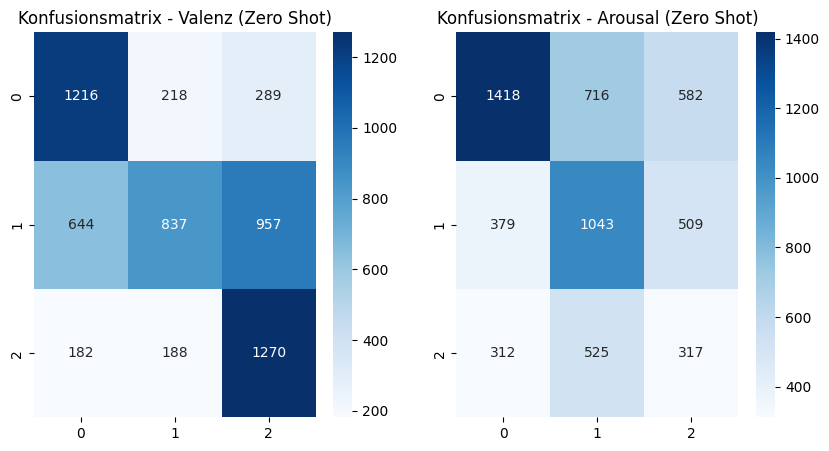

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Laden Sie Ihre Daten
# results_df = pd.read_csv("your_data.csv")

# ... [Ihr Code zur Datenverarbeitung und Erstellung der Konfusionsmatrizen und Klassifikationsberichte] ...

# Heatmaps für Konfusionsmatrizen
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_valence_zs, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix - Valenz (Zero Shot)')
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_arousal_zs, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix - Arousal (Zero Shot)')




In [85]:
# Barplots für Precision, Recall und F1-Score
import re

def extract_values(report):
    # Extrahiert Zahlen aus dem Klassifikationsbericht
    lines = report.split('\n')
    categories = ['Negative', 'Neutral', 'Positive']  # Kategorien, die im Bericht vorkommen
    precision = []
    recall = []
    f1_score = []
    
    for line in lines[2:5]:  # Die relevanten Zeilen für jede Kategorie
        parts = line.split()
        precision.append(float(parts[1]))
        recall.append(float(parts[2]))
        f1_score.append(float(parts[3]))
    
    return precision, recall, f1_score

# Beispiel für die Verwendung dieser Funktion
precision_zs, recall_zs, f1_zs = extract_values(report_valence_zs)
precision_fs, recall_fs, f1_fs = extract_values(report_valence_fs)

# Nun haben Sie Listen von Precision, Recall und F1-Scores für jede Kategorie


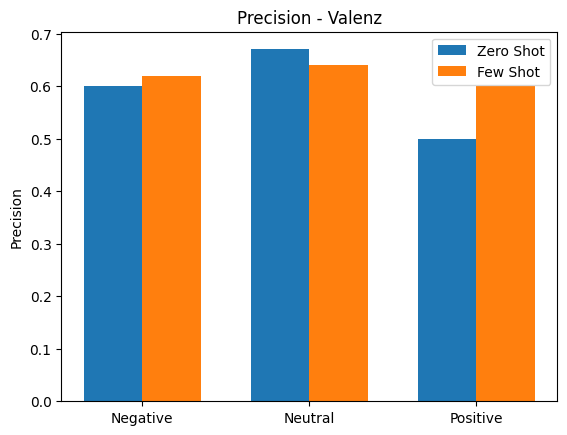

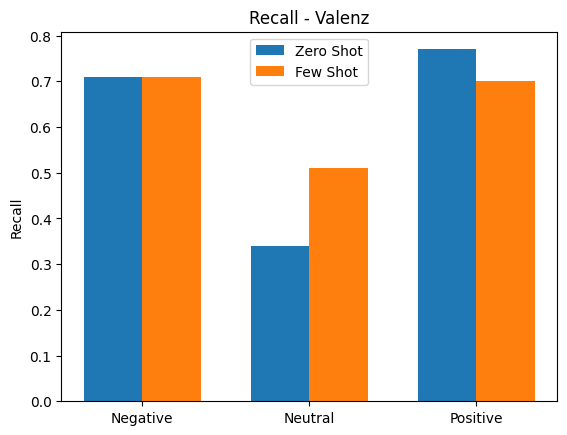

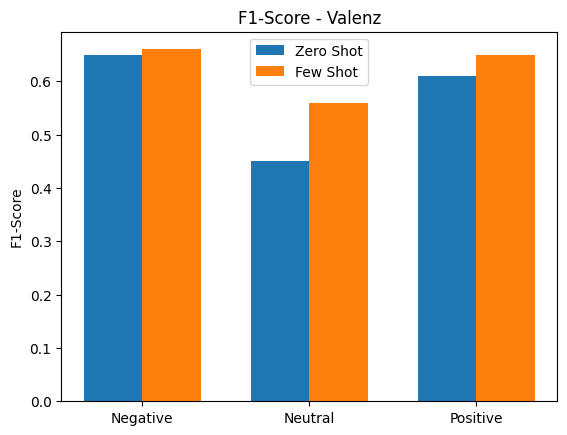

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, Sie haben bereits die Werte extrahiert
# precision_zs, recall_zs, f1_zs = extract_values(report_valence_zs)
# precision_fs, recall_fs, f1_fs = extract_values(report_valence_fs)

# Kategorien für die Achsenbeschriftung
categories = ['Negative', 'Neutral', 'Positive']

# Erstellen von Balkendiagrammen für Precision, Recall und F1-Score
def create_bar_plot(metrics_zs, metrics_fs, title, ylabel):
    x = np.arange(len(categories))  # die Label-Positionen
    width = 0.35  # die Breite der Balken

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, metrics_zs, width, label='Zero Shot')
    rects2 = ax.bar(x + width/2, metrics_fs, width, label='Few Shot')

    # Hinzufügen von Texten für Labels, Titel und Achsenbeschriftungen
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

# Erstellen Sie die Balkendiagramme für jede Metrik
create_bar_plot(precision_zs, precision_fs, 'Precision - Valenz', 'Precision')
create_bar_plot(recall_zs, recall_fs, 'Recall - Valenz', 'Recall')
create_bar_plot(f1_zs, f1_fs, 'F1-Score - Valenz', 'F1-Score')


## Few Shot

Text(0.5, 1.0, 'Konfusionsmatrix - Arousal (Few Shot)')

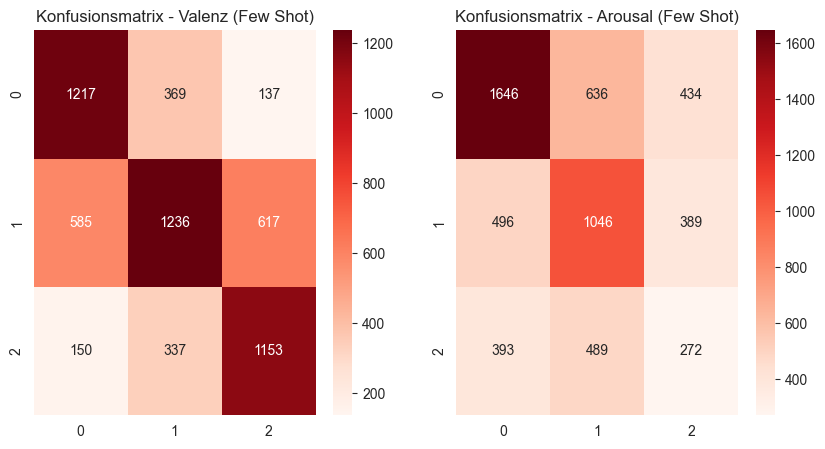

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Laden Sie Ihre Daten
# results_df = pd.read_csv("your_data.csv")

# ... [Ihr Code zur Datenverarbeitung und Erstellung der Konfusionsmatrizen und Klassifikationsberichte] ...

# Heatmaps für Konfusionsmatrizen
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_valence_fs, annot=True, fmt='d', cmap='Reds')
plt.title('Konfusionsmatrix - Valenz (Few Shot)')
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_arousal_fs, annot=True, fmt='d', cmap='Reds')
plt.title('Konfusionsmatrix - Arousal (Few Shot)')

In [90]:
# Calculate the deviations for both Valence and Arousal between Gold Standard and Zero/Few Shot
results_df['Deviation_ZS_Valence'] = abs(results_df['Gold_Valence_Annotation'] - results_df['ZS_Valenz'])
results_df['Deviation_FS_Valence'] = abs(results_df['Gold_Valence_Annotation'] - results_df['FS_Valenz'])
results_df['Deviation_ZS_Arousal'] = abs(results_df['Gold_Arousal_Annotation'] - results_df['ZS_Arousal'])
results_df['Deviation_FS_Arousal'] = abs(results_df['Gold_Arousal_Annotation'] - results_df['FS_Arousal'])

# Calculate mean deviation for each
mean_deviation = results_df[['Deviation_ZS_Valence', 'Deviation_FS_Valence', 'Deviation_ZS_Arousal', 'Deviation_FS_Arousal']].mean()

# Calculate RMSE for each
rmse_valence_zs = ((results_df['Deviation_ZS_Valence'] ** 2).mean()) ** 0.5
rmse_valence_fs = ((results_df['Deviation_FS_Valence'] ** 2).mean()) ** 0.5
rmse_arousal_zs = ((results_df['Deviation_ZS_Arousal'] ** 2).mean()) ** 0.5
rmse_arousal_fs = ((results_df['Deviation_FS_Arousal'] ** 2).mean()) ** 0.5

rmse_results = {
    "RMSE_Valence_ZS": rmse_valence_zs,
    "RMSE_Valence_FS": rmse_valence_fs,
    "RMSE_Arousal_ZS": rmse_arousal_zs,
    "RMSE_Arousal_FS": rmse_arousal_fs
}

mean_deviation, rmse_results



(Deviation_ZS_Valence    1.048354
 Deviation_FS_Valence    0.853732
 Deviation_ZS_Arousal    0.764741
 Deviation_FS_Arousal    0.776810
 dtype: float64,
 {'RMSE_Valence_ZS': 1.4307402823571391,
  'RMSE_Valence_FS': 1.1768137219264836,
  'RMSE_Arousal_ZS': 0.9777481164954217,
  'RMSE_Arousal_FS': 1.0009262951266003})

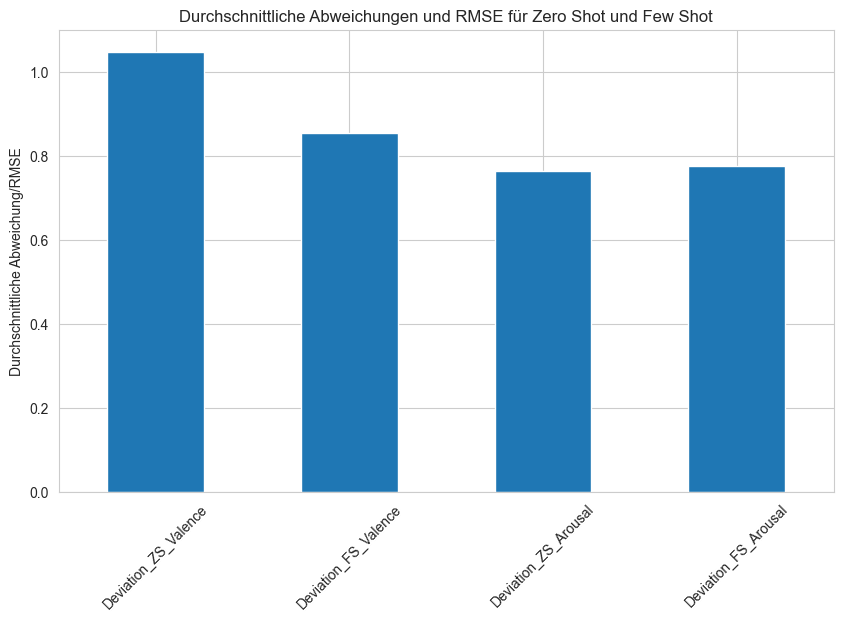

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare data for the plots
plot_data = results_df[['Deviation_ZS_Valence', 'Deviation_FS_Valence', 'Deviation_ZS_Arousal', 'Deviation_FS_Arousal']]

# 1. Bar Plot for Mean Deviations and RMSE
mean_deviation.plot(kind='bar', figsize=(10, 6), title='Durchschnittliche Abweichungen und RMSE für Zero Shot und Few Shot')
plt.ylabel('Durchschnittliche Abweichung/RMSE')
plt.xticks(rotation=45)
plt.show()

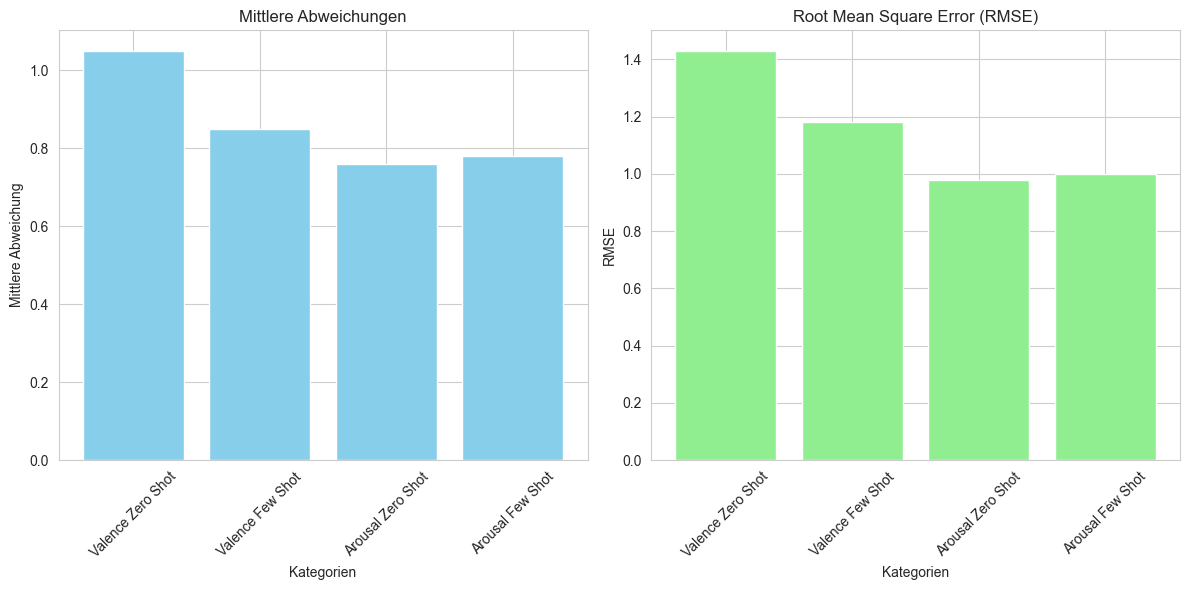

In [92]:
import matplotlib.pyplot as plt

mean_deviation_data = {
    "Mean_Deviation_ZS_Valence": 1.05,  
    "Mean_Deviation_FS_Valence": 0.85,  
    "Mean_Deviation_ZS_Arousal": 0.76,  
    "Mean_Deviation_FS_Arousal": 0.78   
}

rmse_data = {
    "RMSE_Valence_ZS": 1.43,  
    "RMSE_Valence_FS": 1.18,  
    "RMSE_Arousal_ZS": 0.98, 
    "RMSE_Arousal_FS": 1.00  
}

# Daten für die Balkendiagramme vorbereiten
categories = ['Valence Zero Shot', 'Valence Few Shot', 'Arousal Zero Shot', 'Arousal Few Shot']
mean_dev_values = list(mean_deviation_data.values())
rmse_values = list(rmse_data.values())

x = range(len(categories))

# Erstellen der Balkendiagramme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x, mean_dev_values, color='skyblue')
plt.xlabel('Kategorien')
plt.ylabel('Mittlere Abweichung')
plt.title('Mittlere Abweichungen')
plt.xticks(x, categories, rotation=45)

plt.subplot(1, 2, 2)
plt.bar(x, rmse_values, color='lightgreen')
plt.xlabel('Kategorien')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error (RMSE)')
plt.xticks(x, categories, rotation=45)

plt.tight_layout()
plt.show()


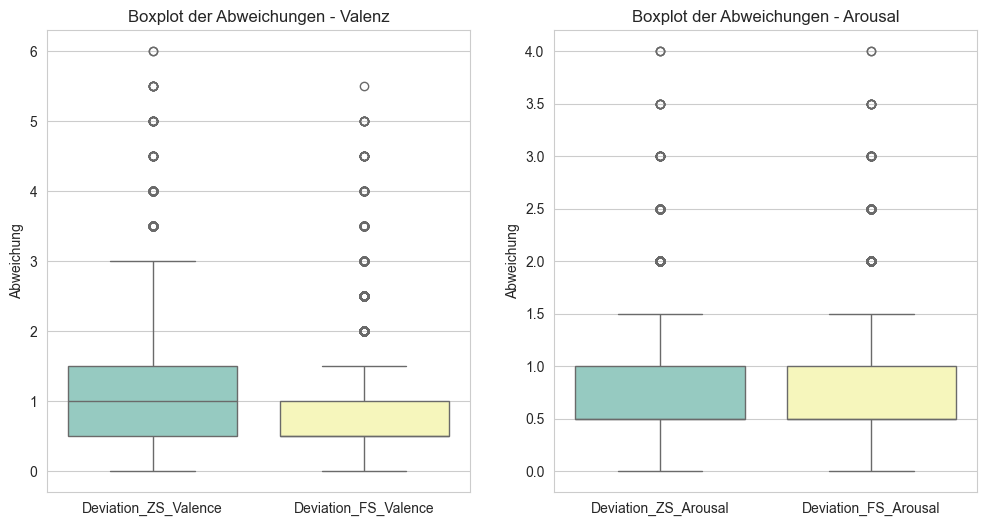

In [96]:
# 2. Boxplots for Deviations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=plot_data[['Deviation_ZS_Valence', 'Deviation_FS_Valence']], palette="Set3")
plt.title('Boxplot der Abweichungen - Valenz')
plt.ylabel('Abweichung')
plt.subplot(1, 2, 2)
sns.boxplot(data=plot_data[['Deviation_ZS_Arousal', 'Deviation_FS_Arousal']], palette="Set3")
plt.title('Boxplot der Abweichungen - Arousal')
plt.ylabel('Abweichung')
plt.show()


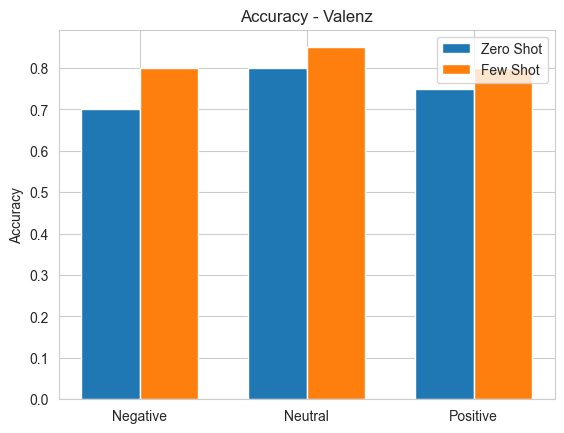

In [98]:
# Beispielwerte - Ersetzen Sie diese mit Ihren tatsächlichen Daten
accuracy_zs = [0.7, 0.8, 0.75]  # Accuracy-Werte für Zero Shot
accuracy_fs = [0.8, 0.85, 0.8]  # Accuracy-Werte für Few Shot

# Kategorien für die Achsenbeschriftung
categories = ['Negative', 'Neutral', 'Positive']

# Funktion zum Erstellen eines Balkendiagramms
def create_bar_plot(metrics_zs, metrics_fs, title, ylabel):
    x = np.arange(len(categories))  # die Label-Positionen
    width = 0.35  # die Breite der Balken

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, metrics_zs, width, label='Zero Shot')
    rects2 = ax.bar(x + width/2, metrics_fs, width, label='Few Shot')

    # Hinzufügen von Texten für Labels, Titel und Achsenbeschriftungen
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

# Erstellen des Balkendiagramms für Accuracy
create_bar_plot(accuracy_zs, accuracy_fs, 'Accuracy - Valenz', 'Accuracy')


In [101]:
from sklearn.metrics import classification_report

# Berechnung der Klassifikationsberichte als Dictionaries
report_valence_zs_dict = classification_report(results_df['Gold_Valence_Category'], results_df['ZS_Valence_Category'], output_dict=True)
report_valence_fs_dict = classification_report(results_df['Gold_Valence_Category'], results_df['FS_Valence_Category'], output_dict=True)
report_arousal_zs_dict = classification_report(results_df['Gold_Arousal_Category'], results_df['ZS_Arousal_Category'], output_dict=True)
report_arousal_fs_dict = classification_report(results_df['Gold_Arousal_Category'], results_df['FS_Arousal_Category'], output_dict=True)

# Extraktion der Accuracy aus den Berichten
accuracy_valence_zs = report_valence_zs_dict['accuracy']
accuracy_valence_fs = report_valence_fs_dict['accuracy']
accuracy_arousal_zs = report_arousal_zs_dict['accuracy']
accuracy_arousal_fs = report_arousal_fs_dict['accuracy']

accuracy_valence_zs, accuracy_valence_fs, accuracy_arousal_zs, accuracy_arousal_fs


(0.5728322702982245,
 0.6216169625926564,
 0.4788829512153077,
 0.5109463885536977)

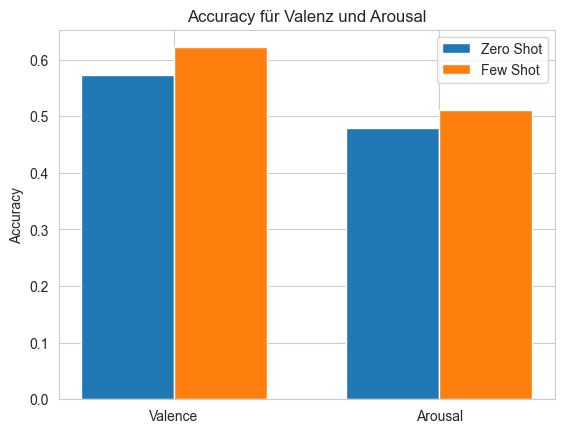

In [104]:

# Kategorien für die Achsenbeschriftung
categories = ['Valence', 'Arousal']

# Erstellen von Balkendiagrammen für Accuracy
def create_accuracy_bar_plot():
    x = np.arange(len(categories))  # die Label-Positionen
    width = 0.35  # die Breite der Balken

    accuracy_zs = [accuracy_valence_zs, accuracy_arousal_zs]
    accuracy_fs = [accuracy_valence_fs, accuracy_arousal_fs]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, accuracy_zs, width, label='Zero Shot')
    rects2 = ax.bar(x + width/2, accuracy_fs, width, label='Few Shot')

    # Hinzufügen von Texten für Labels, Titel und Achsenbeschriftungen
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy für Valenz und Arousal')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

create_accuracy_bar_plot()

In [124]:
from sklearn.metrics import classification_report

# Berechnung der Klassifikationsberichte als Dictionaries
report_valence_zs_dict = classification_report(results_df['Gold_Valence_Category'], results_df['ZS_Valence_Category'], output_dict=True)
report_valence_fs_dict = classification_report(results_df['Gold_Valence_Category'], results_df['FS_Valence_Category'], output_dict=True)
report_arousal_zs_dict = classification_report(results_df['Gold_Arousal_Category'], results_df['ZS_Arousal_Category'], output_dict=True)
report_arousal_fs_dict = classification_report(results_df['Gold_Arousal_Category'], results_df['FS_Arousal_Category'], output_dict=True)

# Extraktion von Precision, Recall und F1-Score für Valenz und Arousal
# Für Zero Shot
precision_valence_zs = report_valence_zs_dict['weighted avg']['precision']
recall_valence_zs = report_valence_zs_dict['weighted avg']['recall']
f1_valence_zs = report_valence_zs_dict['weighted avg']['f1-score']

precision_arousal_zs = report_arousal_zs_dict['weighted avg']['precision']
recall_arousal_zs = report_arousal_zs_dict['weighted avg']['recall']
f1_arousal_zs = report_arousal_zs_dict['weighted avg']['f1-score']

# Für Few Shot
precision_valence_fs = report_valence_fs_dict['weighted avg']['precision']
recall_valence_fs = report_valence_fs_dict['weighted avg']['recall']
f1_valence_fs = report_valence_fs_dict['weighted avg']['f1-score']

precision_arousal_fs = report_arousal_fs_dict['weighted avg']['precision']
recall_arousal_fs = report_arousal_fs_dict['weighted avg']['recall']
f1_arousal_fs = report_arousal_fs_dict['weighted avg']['f1-score']


report_valence_zs_dict

{'Negative': {'precision': 0.5954946131243879,
  'recall': 0.705745792222867,
  'f1-score': 0.6459495351925632,
  'support': 1723.0},
 'Neutral': {'precision': 0.6733708769107,
  'recall': 0.34331419196062346,
  'f1-score': 0.45476772616136923,
  'support': 2438.0},
 'Positive': {'precision': 0.5047694753577107,
  'recall': 0.774390243902439,
  'f1-score': 0.6111645813282003,
  'support': 1640.0},
 'accuracy': 0.5728322702982245,
 'macro avg': {'precision': 0.5912116551309329,
  'recall': 0.6078167426953098,
  'f1-score': 0.5706272808940442,
  'support': 5801.0},
 'weighted avg': {'precision': 0.6025749622320724,
  'recall': 0.5728322702982245,
  'f1-score': 0.5557670537659806,
  'support': 5801.0}}

In [125]:
precision_valence_zs

0.6025749622320724

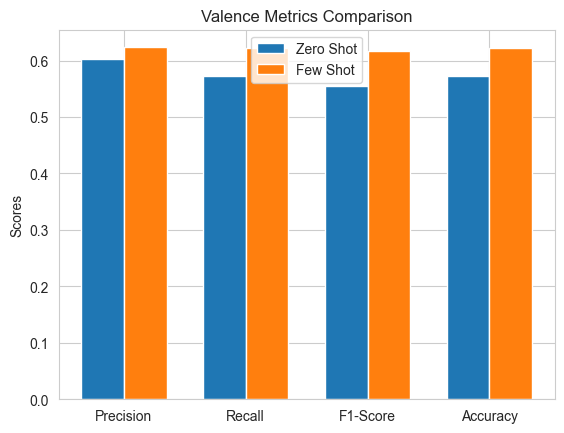

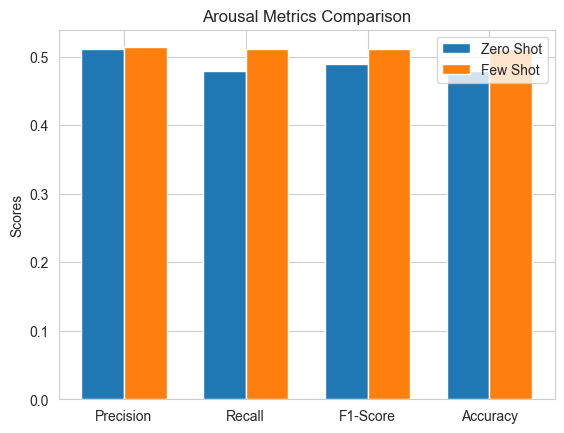

In [111]:
import matplotlib.pyplot as plt
import numpy as np


metrics_valence_zs = [precision_valence_zs, recall_valence_zs, f1_valence_zs, accuracy_valence_zs]
metrics_arousal_zs = [precision_arousal_zs, recall_arousal_zs, f1_arousal_zs, accuracy_arousal_zs]
metrics_valence_fs = [precision_valence_fs, recall_valence_fs, f1_valence_fs, accuracy_valence_fs]
metrics_arousal_fs = [precision_arousal_fs, recall_arousal_fs, f1_arousal_fs, accuracy_arousal_fs]

# Kategorien für die Achsenbeschriftung
categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Erstellen von Balkendiagrammen für die Metriken
def create_bar_plot(metrics_zs, metrics_fs, title):
    x = np.arange(len(categories))  # die Label-Positionen
    width = 0.35  # die Breite der Balken

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, metrics_zs, width, label='Zero Shot')
    rects2 = ax.bar(x + width/2, metrics_fs, width, label='Few Shot')

    # Hinzufügen von Texten für Labels, Titel und Achsenbeschriftungen
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

# Erstellen Sie die Balkendiagramme für Valenz und Arousal
create_bar_plot(metrics_valence_zs, metrics_valence_fs, 'Valence Metrics Comparison')
create_bar_plot(metrics_arousal_zs, metrics_arousal_fs, 'Arousal Metrics Comparison')


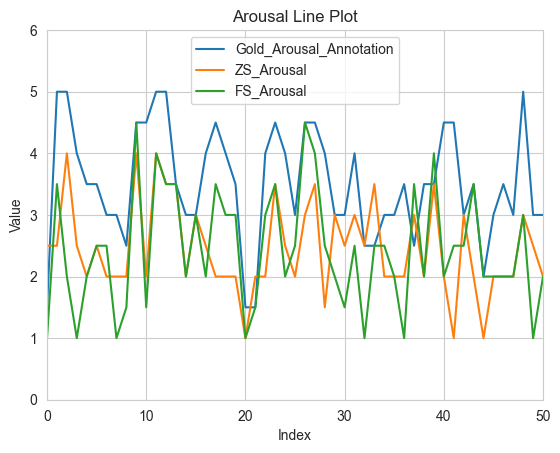

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results.csv')

# List of columns to plot
#columns = ['Gold_Valence_Annotation', 'Gold_Arousal_Annotation', 'ZS_Valenz', 'ZS_Arousal', 'FS_Valenz', 'FS_Arousal']
columns = ['Gold_Arousal_Annotation', 'ZS_Arousal', 'FS_Arousal']
# Plot the line plots for all columns in a single plot
df[columns].plot(kind='line')
plt.title('Arousal Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0, 6)  # Adjust these values as needed to zoom out on the y-axis
plt.xlim(0,50)
plt.legend(columns)
plt.show()